In [1]:
import numpy as np
from sympy import diff, Symbol, lambdify
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive
from prettytable import PrettyTable
from scipy.optimize import fsolve, minimize, fmin
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Professor Boxin Zhao - Universiy of Waterloo

Problem 1:  The Lennard-Jones potential is  a  special  case  of  the  interaction  “pair  potential”. 

$$w(r) = -\frac{A}{r^6} + \frac{B}{r^12}$$

In  this  potential  the  attractive  (negative)  contribution is the van der Waals interaction potential which varies with the inverse-sixth power of the distance. Make a sketch of how the energy w(r) and force F(r) vary with r.  
For the interaction between two atoms the values of A and B are known to be A = 10-77 J m6 and B= 10-134 J m12. 

What is the minimum Lennard-Jones potential wmin for this interaction in units of kT at 298K, and what is the maximum adhesion force Fmax between the two atoms?  

Is this force measurable with a sensitive balance, and why?

In [2]:
def lennard_jones_potential(r, A = 10**-77, B = 10**-134):
    w = -(A*r**-6) + (B*r**-12)
    return w

def lennard_jones_force(r, A = 10**-77, B = 10**-134):
    x = Symbol('x')
    w = -(A*(x**-6)) + (B*(x**-12))
    wprime = w.diff(x)
    f = lambdify(x, wprime)
    force = -1*f(r)
    return force

def lennard_jones_plot():
    pot = []
    force = []
    D = np.linspace(.3*10**-9, .6*10**-9, 500) #[m]
    for item in D:
        pot.append(lennard_jones_potential(item))
        force.append(lennard_jones_force(item))

    figure, ax1 = plt.subplots(figsize = (7,7))
    ax2 = ax1.twinx()
    plt.xlim([.3*10**-9, .6*10**-9])
    ax1.plot(D, pot, figure=figure, label = 'Lennard-Jones Potential', color = 'blue')
    ax2.plot(D, force, figure=figure, color = 'orange', label = 'Lennard-Jones Force')
    ax1.plot([.3*10**-9, .6*10**-9], [0, 0], figure=figure, color = 'black', linewidth = 1)
    ax2.plot([.3*10**-9, .6*10**-9], [0, 0], figure=figure, color = 'black', linewidth = 1)
    plt.title('CHE612 - Lennard - Jones')
    ax1.set_xlabel('Distance [m]')
    ax1.set_ylabel('Potential [J]')
    ax2.set_ylabel('Force [J/m]')

    w_min = minimize(lennard_jones_potential, .2*10**-9, tol = 1*10**-30)
    if .3*10**-9 <= w_min.x[0] <= .6*10**-9:
        ax1.plot(w_min.x[0], w_min.fun, marker = 'o', color = 'red', lineStyle = 'None', label = "Minimum Potential")
    
    f_max = fmin(lennard_jones_force, w_min.x[0])
    if .3*10**-9 <= f_max[0] <= .6*10**-9:
        ax2.plot(f_max[0], lennard_jones_force(f_max[0]), marker = 'o', color = 'green', lineStyle = 'None', label = "Maximum Force")
    
    ax1.legend(loc=2)
    ax2.legend()
    
    return w_min.x[0], f_max[0], lennard_jones_potential(w_min.x[0]), lennard_jones_force(f_max[0])
    
    


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 2
Minimum potential -2.4981138213879797e-21 J, Maximum force -1.4462590256722098e-11 N
Minimum potential -0.6071727421879997 kT


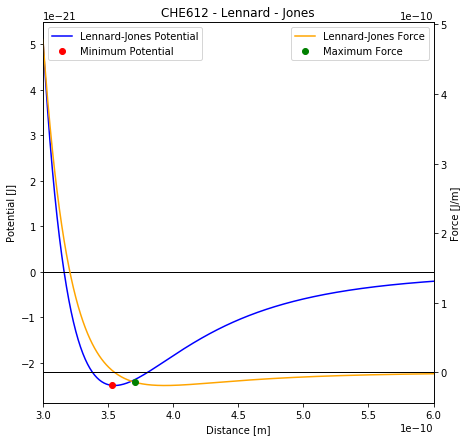

In [3]:
wmin_r, fmax_r, wmin, fmax = lennard_jones_plot()
print(f"""Minimum potential {wmin} J, Maximum force {fmax} N""")

k = 1.3806503*10**-23
T = 298 

kT = k * T #[J]
wmin_kT = wmin / kT
fmax_kT = fmax / kT

print(f"""Minimum potential {wmin_kT} kT""")


If a typical balance can measure to .0000001 g or 10^-9 N then any force less than 10^-9 N will be undetectable.

(.0000001 g = 10^-10 kg * 9.81 m/s^2 ~ 10^-9 N)